In [52]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
# Removing unnecessary columns
dataset = dataset.iloc[:,3:]

In [55]:
dataset.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [56]:
n = dataset['Exited']
dataset.drop('Exited', axis = 1, inplace = True)
dataset = pd.get_dummies(dataset, drop_first = True)
dataset['Exited'] = n
dataset.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0


In [57]:
# Creating X and Y
X = dataset.iloc[:,:11].values
y = dataset.iloc[:,-1].values

In [58]:
# Splitting into test and train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [59]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [60]:
# importing libraries for ANN
import keras

Using TensorFlow backend.


In [61]:
from keras.models import Sequential
from keras.layers import Dense

In [62]:
# initializing the ANN
ann = Sequential()

In [64]:
# Adding the input layer
ann.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

C:\Users\Prateikm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  


In [65]:
# Adding the hidden layer
ann.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

C:\Users\Prateikm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  


In [66]:
# Adding the output layer - use 'softmax' if there are more than 1 categories
ann.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\Prateikm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [67]:
# Compiling the Artificial neural network - loss function = 'binary_crossentropy' for binary and 'categorical_crossentropy'
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [68]:
# Fitting the ann to the training set
ann.fit(X_train, y_train, batch_size= 10, nb_epoch = 100)

C:\Users\Prateikm\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
8000/8000 [==============================] - 2s 214us/step - loss: 0.4822 - acc: 0.7970
Epoch 2/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4281 - acc: 0.7972
Epoch 3/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.4218 - acc: 0.8015
Epoch 4/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4184 - acc: 0.8251
Epoch 5/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.4162 - acc: 0.8304
Epoch 6/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.4149 - acc: 0.8296
Epoch 7/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4136 - acc: 0.8322
Epoch 8/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4121 - acc: 0.8330
Epoch 9/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4103 - acc: 0.8336
Epoch 10/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4101 - acc: 0.8349

8000/8000 [==============================] - 1s 100us/step - loss: 0.3995 - acc: 0.8364 0s - loss: 0.3975 
Epoch 82/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.3995 - acc: 0.8371
Epoch 83/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.3997 - acc: 0.8355
Epoch 84/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.3996 - acc: 0.8369
Epoch 85/100
8000/8000 [==============================] - 1s 99us/step - loss: 0.3990 - acc: 0.8365
Epoch 86/100
8000/8000 [==============================] - 1s 149us/step - loss: 0.3992 - acc: 0.8365
Epoch 87/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.3992 - acc: 0.8369 0s - loss: 0.4000 - acc: 0.
Epoch 88/100
8000/8000 [==============================] - 1s 108us/step - loss: 0.3987 - acc: 0.8361
Epoch 89/100
8000/8000 [==============================] - 1s 105us/step - loss: 0.3983 - acc: 0.8364
Epoch 90/100
8000/8000 [==============================] - 1

In [69]:
# Making prediction
y_pred = ann.predict(X_test)
y_pred

array([[ 0.19875935],
       [ 0.12328806],
       [ 0.2423477 ],
       ..., 
       [ 0.05416535],
       [ 0.1109615 ],
       [ 0.48247513]], dtype=float32)

In [70]:
# Convert probabilities into true or false - threshold = 0.5
y_pred = (y_pred > 0.5)

In [71]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [72]:
cm

array([[1532,   53],
       [ 261,  154]], dtype=int64)

In [73]:
# roc auc score - sensitivity vs specificity plot
# Area under curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.66882292577249047

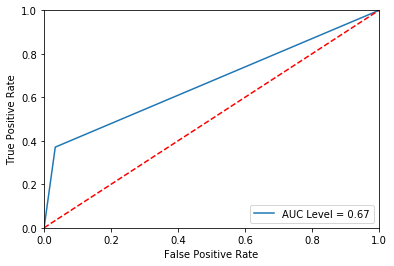

In [77]:
# Plotting roc curve

from sklearn import metrics

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,label='AUC Level = %0.2f' % (roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()